### Trace Dataset
The Trace dataset is a time series dataset that is often used for testing and benchmarking time series classification and clustering algorithms.

Characteristics:

Type: Synthetic dataset

Number of classes: 4

Number of time series: 200 (100 for training, 100 for testing)
Time series length: 275 data points

Domain: The dataset is designed to simulate instrumentation failures in a nuclear power plant.

Source: Originally part of the Transient Classification Benchmark (trace project), created by Davide Roverso.
Data Representation:

Each time series in the Trace dataset represents a sequence of sensor readings over time. There are four different classes, corresponding to different types of instrumentation failures. The goal of using this dataset is typically to train a model that can accurately classify or cluster new time series based on their similarity to the existing ones.

Usage:

The Trace dataset is commonly used for:

* Time series classification: Training models to assign new time series to one of the four predefined classes.
* Time series clustering: Grouping similar time series together based on their shape and patterns.
* Benchmarking: Evaluating the performance of different time series algorithms on a standardized dataset.
Availability:

The Trace dataset is readily available through the tslearn library in Python.

For more detailed information, you can refer to the following:

The UCR Time Series Classification Archive, which may contain additional details about the dataset.


### Code Outline

1. Import necessary libraries: numpy, pandas, tslearn.
1. Load the Trace dataset: The Trace dataset from tslearn.datasets is a collection of 200 synthetic time series, each with 275 data points. It's a good dataset for testing time series clustering algorithms.
1. Scale the data: Using TimeSeriesScalerMeanVariance to scale the time series data to have zero mean and unit variance can help improve the performance of the clustering algorithm.
1. Perform k-means clustering: TimeSeriesKMeans from tslearn.clustering is used to perform k-means clustering with the DTW distance metric. This is suitable for time series data as it considers the temporal order of the data points.
1. Get cluster labels: km.predict is used to get the cluster labels for the test data.
1. Print cluster labels: Finally, the cluster labels are printed.

**Dataset**:

The code uses the "Trace" dataset available within the ```tslearn``` library.

You can easily load it using ```CachedDatasets().load_dataset("Trace")```. It is a relatively small and well-behaved dataset suitable for initial testing.

To further explore time series datasets for testing and experimenting, I recommend checking out online repositories like the UCR Time Series Classification Archive, which offers a wide variety of real-world and synthetic datasets.

**Additional considerations**:

* You can change the number of clusters (n_clusters) to experiment with different cluster sizes.

* Adjust the max_iter parameter to control the maximum number of iterations for the k-means algorithm.

* Explore other distance metrics besides DTW, such as Euclidean distance or correlation-based distances.

* Consider using other clustering algorithms, like hierarchical clustering or DBSCAN, for comparison.

In [1]:
%pip install tslearn

Note: you may need to restart the kernel to use updated packages.


### Load Dataset

In [2]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Load the Trace dataset
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")

### Your Turn: Display some data time series

In [4]:
# Scale the data
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

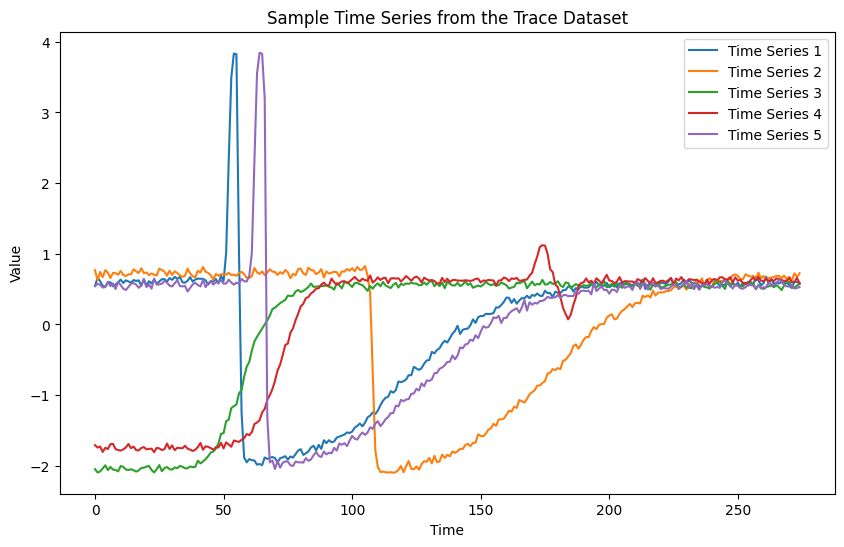

In [9]:
# Display some time series from the dataset
plt.figure(figsize=(10, 6))
for i in range(5):  # Display the first 5 time series
    plt.plot(X_train_scaled[i].ravel(), label=f"Time Series {i+1}")
plt.title("Sample Time Series from the Trace Dataset")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

### Create Cluster

Your Turn: What is the number of clusters to use? How to test?

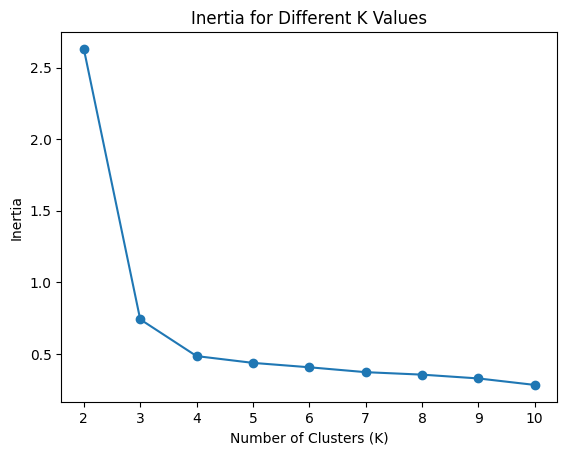

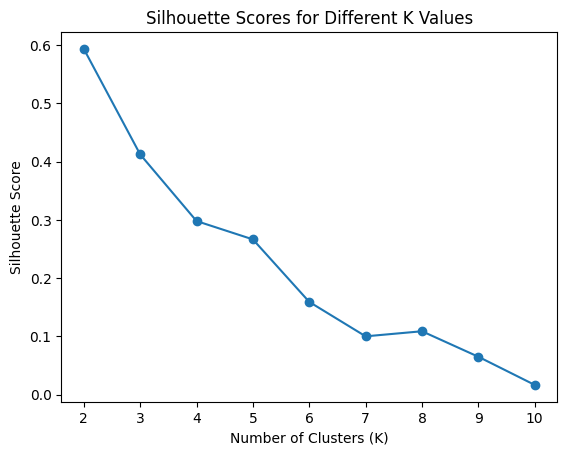

Best K: 2


In [14]:
K_range = range(2, 11)

# Run K-means and calculate inertia and silhouette scores
inertia = []
silhouette_scores = []

for K in K_range:
    km = TimeSeriesKMeans(n_clusters=K, metric="dtw", max_iter=10, random_state=0)
    km.fit(X_train)
    inertia.append(km.inertia_)
    
    # Reshape the data to 2D for silhouette score calculation
    X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
    silhouette_scores.append(silhouette_score(X_train_reshaped, km.labels_))

# Plot inertia
plt.plot(K_range, inertia, marker='o')
plt.title('Inertia for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Plot silhouette scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Select the best K (based on the highest silhouette score)
best_K = K_range[np.argmax(silhouette_scores)]
print(f"Best K: {best_K}")


In [ ]:
https://tokopedia.link/N2kUsyFn6Ob

In [13]:
#Clustering

# Scale the time series data
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance().fit_transform(X_test)

# Perform k-means clustering with DTW distance
km = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=10, random_state=0)
km.fit(X_train)

# Get cluster labels for the test data
predicted_labels = km.predict(X_test)



### Your Turn : Plot the class centroids

### Calculate some metrics

For External Evaluation (when you have ground truth labels):

1. Adjusted Rand Index (ARI): Measures the similarity between the predicted cluster assignments and the true cluster labels, considering all pairs of data points. It ranges from -1 to 1, with 1 indicating perfect agreement.
1. Normalized Mutual Information (NMI): Quantifies the amount of information shared between the predicted clusters and the true clusters. It ranges from 0 to 1, with 1 indicating perfect agreement.
1. Homogeneity, Completeness, and V-measure: These metrics assess the homogeneity (cluster purity), completeness (all members of a true cluster are assigned to the same predicted cluster), and a harmonic mean of both (V-measure).

For Internal Evaluation (when you don't have ground truth labels):

1. Silhouette Score: Measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better clustering.
1. Davies-Bouldin Index: Calculates the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.
1. Calinski-Harabasz Index: Measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better clustering.

Consider using dynamic time warping (DTW) based metrics for Time Series Data which are more suitable for time series data.


### Your Turn: Silhouette Score

Internal score

Calculate the Silhouette score using the "DTW" option. Evaluate the quality of the clusters using the score. You can find it in the tslearn.clustering library.

Also calculate Davies-Bouldin Index and Calinski-Harabasz index. There are available in sklearn.metrics.

### Your Turn : Calculate the ARI and NMI

External Score

Evaluate the results based on the score. You can find the functions in sklearn.metrics